# Movielens Dataset Analysis 

In [47]:
## Importing required libraries

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Importing datasets........

In [48]:
## Importing data....

## Movies Data
movies_df = pd.read_csv('C:/Users/Hema/OneDrive/Desktop/Projects/movies.dat', sep="::", names=['MovieID','Title','Genres'], encoding= 'latin-1')

## User data
users_df = pd.read_csv('C:/Users/Hema/OneDrive/Desktop/Projects/users.dat', sep="::",
                        names=['UserID','Gender','Age','Occupation','Zip-Code'], encoding = 'latin-1')

## Ratings data
ratings_df = pd.read_csv('C:/Users/Hema/OneDrive/Desktop/Projects/ratings.dat', 
                        sep="::", names=['UserID','MovieID','Rating','Timestamp'], encoding = 'latin-1')


C:\Users\Hema\AppData\Local\Temp\ipykernel_3240\2690926489.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv('C:/Users/Hema/OneDrive/Desktop/Projects/movies.dat', sep="::", names=['MovieID','Title','Genres'], encoding= 'latin-1')
C:\Users\Hema\AppData\Local\Temp\ipykernel_3240\2690926489.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = pd.read_csv('C:/Users/Hema/OneDrive/Desktop/Projects/users.dat', sep="::",
C:\Users\Hema\AppData\Local\Temp\ipykernel_3240\2690926489.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support 

In [49]:
movies_df.shape

(3883, 3)

In [50]:
ratings_df.shape

(1000209, 4)

In [51]:
users_df.shape

(6040, 5)

## Create a new Masterdata

In [53]:
data1_df = movies_df.merge(ratings_df,on='MovieID',how='inner')
data1_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [128]:
new_data_df.shape

(1000209, 6)

In [55]:
data2_df = new_data_df.merge(users_df,on="UserID",how='inner')
data2_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [56]:
data2_df.shape

(1000209, 10)

In [57]:
users_df = pd.merge(ratings_df,users_df, on=['UserID'])
movies_df = pd.merge(ratings_df,movies_df, on=['MovieID'])

master_data = pd.merge(users_df, movies_df,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Gender', 'Age', 'Occupation', "Rating"]]
master_data.head()

,MovieID,Title,UserID,Gender,Age,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,F,1,10,5
1,661,James and the Giant Peach (1996),1,F,1,10,3
2,914,My Fair Lady (1964),1,F,1,10,3
3,3408,Erin Brockovich (2000),1,F,1,10,4
4,2355,"Bug's Life, A (1998)",1,F,1,10,5


In [75]:
master_data.shape

(1000209, 7)

In [59]:
# User Age Distribution

In [60]:
# Users with different age groups
master_data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

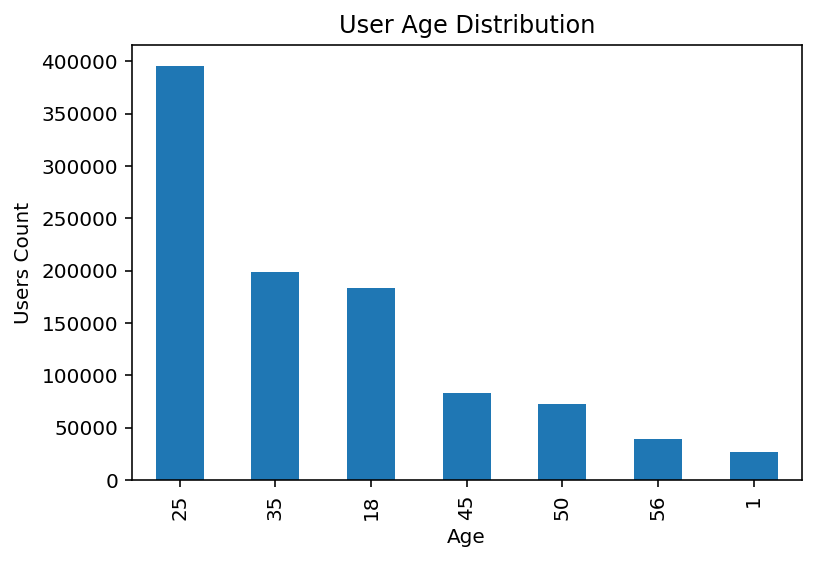

In [61]:
# Plot for users with different age group
master_data['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

# User rating of the movie -- "Toy Story”

In [63]:
# Toy Story
ToyStory_Rating = master_data[master_data['Title'].str.contains('Toy Story') == True]
ToyStory_Rating

,MovieID,Title,UserID,Gender,Age,Occupation,Rating
40,1,Toy Story (1995),1,F,1,10,5
50,3114,Toy Story 2 (1999),1,F,1,10,4
203,3114,Toy Story 2 (1999),3,M,25,15,3
469,1,Toy Story (1995),6,F,50,9,4
581,1,Toy Story (1995),8,M,25,12,4
...,...,...,...,...,...,...,...
998170,1,Toy Story (1995),6032,M,45,7,4
998360,1,Toy Story (1995),6035,F,25,1,4
998926,3114,Toy Story 2 (1999),6036,F,25,15,4
999583,3114,Toy Story 2 (1999),6037,F,45,1,4


In [64]:
ToyStory_Rating.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

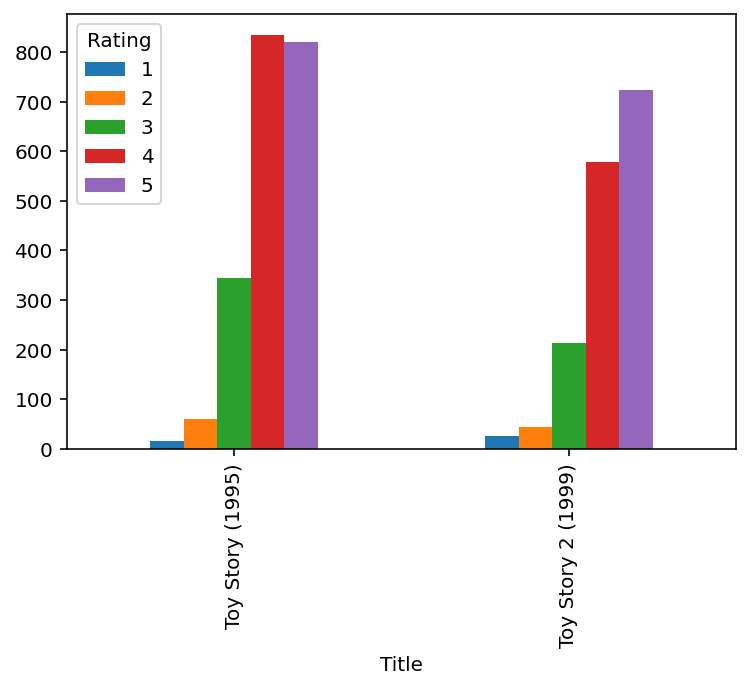

In [65]:
ToyStory_Rating.groupby(["Title","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

# Top 25 movies by viewership rating

In [67]:
df_Top25Movies = master_data.groupby('Title').size().sort_values(ascending=False)[:25]
df_Top25Movies 

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

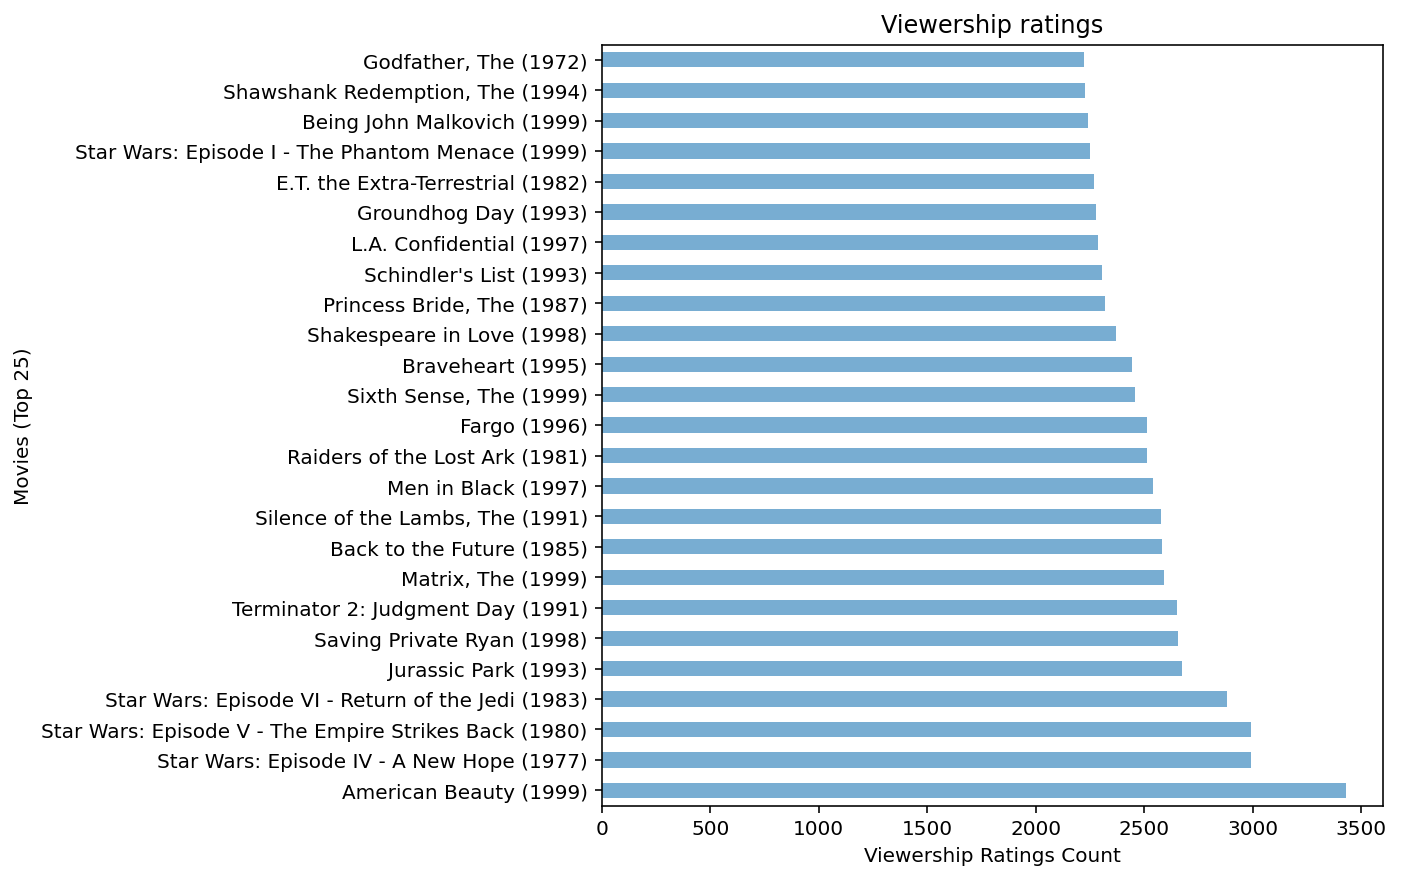

In [68]:
df_Top25Movies.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Viewership ratings")
plt.show()

# All movies reviewed by user id = 2696

In [70]:
userId = 2696
RatingsByUserId = master_data[master_data["UserID"] == userId]
RatingsByUserId

,MovieID,Title,UserID,Gender,Age,Occupation,Rating
440667,1258,"Shining, The (1980)",2696,M,25,7,4
440668,1270,Back to the Future (1985),2696,M,25,7,2
440669,1617,L.A. Confidential (1997),2696,M,25,7,4
440670,1625,"Game, The (1997)",2696,M,25,7,4
440671,1644,I Know What You Did Last Summer (1997),2696,M,25,7,2
440672,1645,"Devil's Advocate, The (1997)",2696,M,25,7,4
440673,1805,Wild Things (1998),2696,M,25,7,4
440674,1892,"Perfect Murder, A (1998)",2696,M,25,7,4
440675,800,Lone Star (1996),2696,M,25,7,5
440676,2338,I Still Know What You Did Last Summer (1998),2696,M,25,7,2


In [71]:
# Feature Engineering

In [82]:
# Find out all the unique genres

Genres_df = movies_df['Genres'].value_counts().head()
Genres_df

Comedy            116883
Drama             111423
Comedy|Romance     42712
Comedy|Drama       42245
Drama|Romance      29170
Name: Genres, dtype: int64

In [84]:
# unique Genres
data1_df['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [ ]:
# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [87]:
ratingsOneHot = data2_df['Genres'].str.get_dummies("|")
ratingsOneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [88]:
data2_df = pd.concat([data2_df,ratingsOneHot],axis=1)

In [89]:
data2_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


## Determine the features affecting the ratings of any particular movie.

In [91]:
data2_df[["title","Year"]] = data2_df.Title.str.extract("(.)\s\((.\d+)",expand=True)
data2_df = data2_df.drop(columns=["title"])
data2_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,1995
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,0,1,0,0,0,1977
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,1,0,1993


In [92]:
data2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   Genres       1000209 non-null  object
 3   UserID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Timestamp    1000209 non-null  int64 
 6   Gender       1000209 non-null  object
 7   Age          1000209 non-null  int64 
 8   Occupation   1000209 non-null  int64 
 9   Zip-Code     1000209 non-null  object
 10  Action       1000209 non-null  int64 
 11  Adventure    1000209 non-null  int64 
 12  Animation    1000209 non-null  int64 
 13  Children's   1000209 non-null  int64 
 14  Comedy       1000209 non-null  int64 
 15  Crime        1000209 non-null  int64 
 16  Documentary  1000209 non-null  int64 
 17  Drama        1000209 non-null  int64 
 18  Fantasy      1000209 n

In [93]:
data2_df['Year'] = data2_df.Year.astype(int)

In [95]:
data2_df['Movie_Age'] = 2000 - data2_df.Year
data2_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [96]:
data2_df['Gender'] = data2_df.Gender.str.replace('F','1')
data2_df['Gender'] = data2_df.Gender.str.replace('M','0')
data2_df['Gender'] = data2_df.Gender.astype(int)
data2_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [99]:
GenderAffecting_df = data2_df.groupby('Gender').size().sort_values(ascending=False)[:25]
GenderAffecting_df

Gender
0    753769
1    246440
dtype: int64

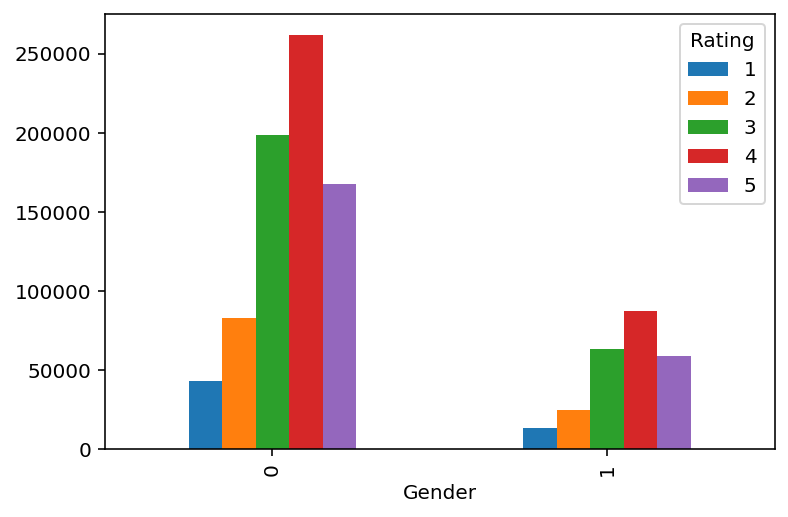

In [100]:
data2_df.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

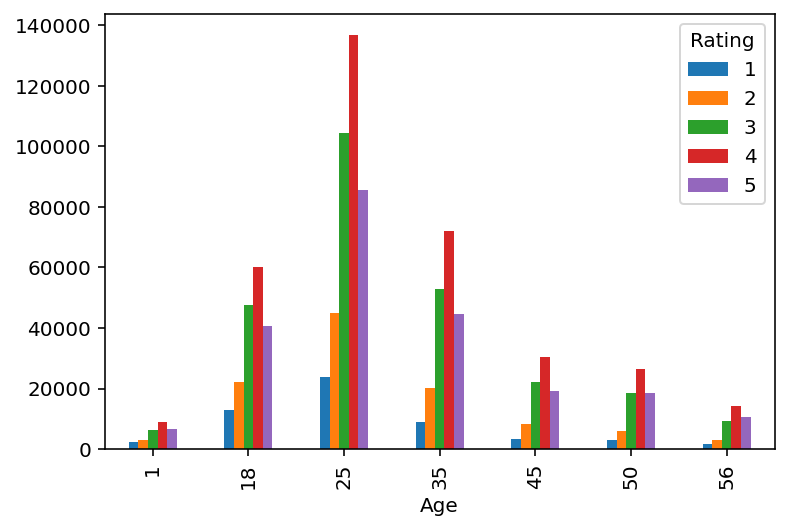

In [101]:
data2_df.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

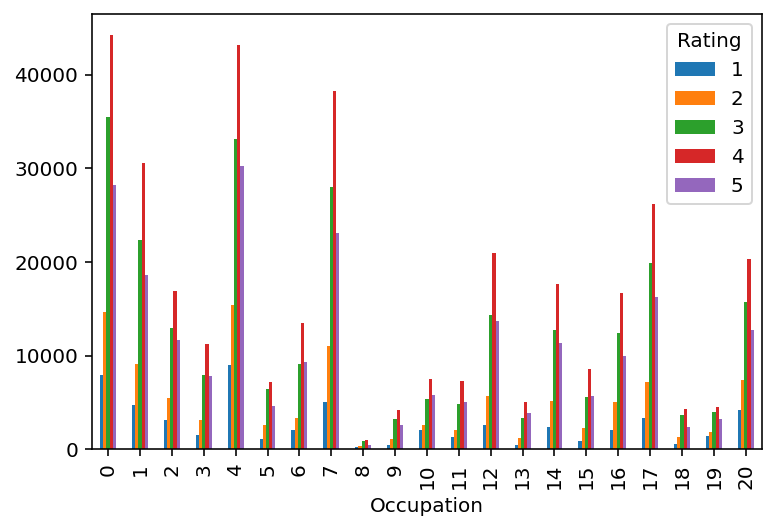

In [102]:
data2_df.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

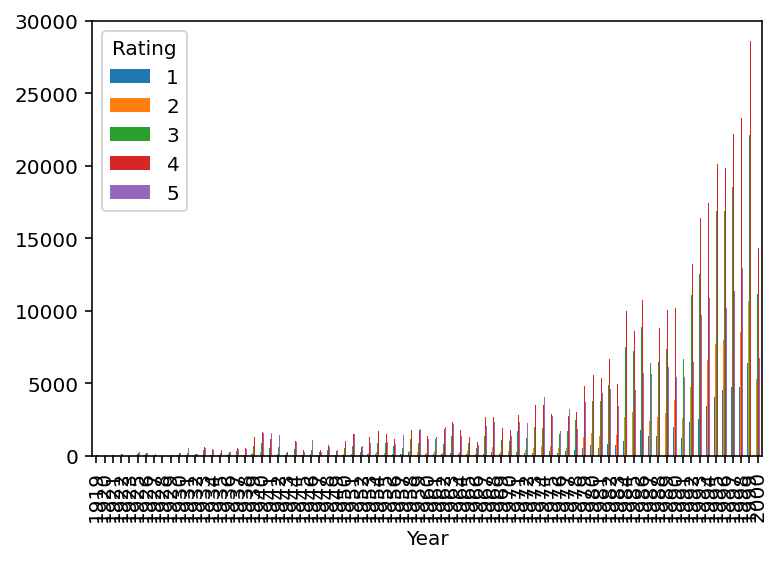

In [103]:
data2_df.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

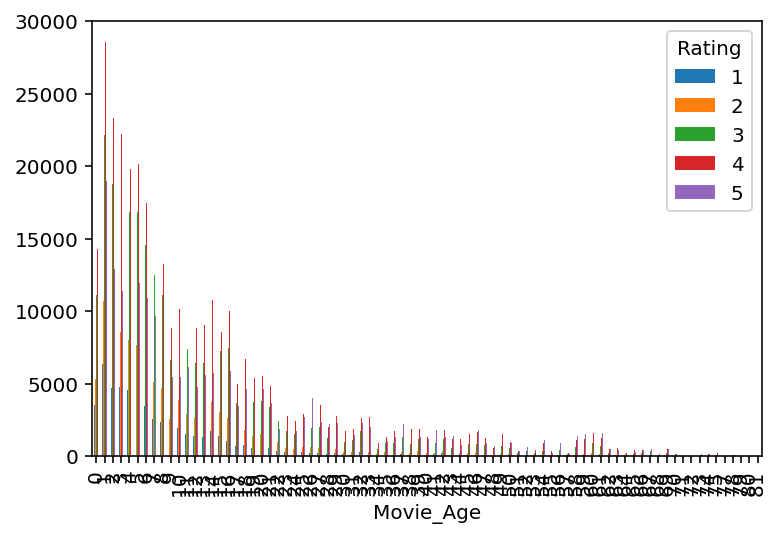

In [104]:
data2_df.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

# Develop an appropriate model to predict the movie ratings

In [106]:
#First 500 extracted records
first_500 = data2_df[:1000]
first_500

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2384,Babe: Pig in the City (1998),Children's|Comedy,18,2,978155233,1,18,3,95825,...,0,0,0,0,0,0,0,0,1998,2
996,2391,"Simple Plan, A (1998)",Crime|Thriller,18,1,978155685,1,18,3,95825,...,0,0,0,0,0,1,0,0,1998,2
997,2394,"Prince of Egypt, The (1998)",Animation|Musical,18,4,978154907,1,18,3,95825,...,0,1,0,0,0,0,0,0,1998,2
998,2402,Rambo: First Blood Part II (1985),Action|War,18,2,978153894,1,18,3,95825,...,0,0,0,0,0,0,1,0,1985,15


In [111]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values
features

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [2394,   18,    3],
       [2402,   18,    3],
       [2404,   18,    3]], dtype=int64)

In [110]:
#Use rating as label
labels = first_500[['Rating']].values
labels

array([[5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
    

In [112]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [113]:
train

array([[3035,   35,    1],
       [1393,   25,   17],
       [3198,   35,    1],
       ...,
       [1073,   18,    3],
       [ 784,   35,    1],
       [2802,   50,    9]], dtype=int64)

In [114]:
test

array([[1265,   35,    1],
       [3408,   35,    1],
       [3447,   35,    1],
       [2423,   35,    1],
       [ 539,   35,    1],
       [2657,   35,    1],
       [2109,   35,    1],
       [1247,   35,    1],
       [1064,   18,    3],
       [ 105,   25,   12],
       [ 421,   18,    3],
       [1035,   50,    9],
       [2140,   35,    1],
       [2140,   18,    3],
       [2000,   18,    3],
       [1527,   18,    3],
       [ 508,   25,   17],
       [1275,   18,    3],
       [3704,   35,    1],
       [1653,   25,   17],
       [1380,   35,    1],
       [1027,   25,   12],
       [   7,   35,    1],
       [1282,   35,    1],
       [2006,   25,   12],
       [2712,   25,   12],
       [2506,   50,    9],
       [2278,   18,    3],
       [1562,   18,    3],
       [2021,   18,    3],
       [3114,   25,   17],
       [ 150,   25,   12],
       [2094,   35,    1],
       [1203,   35,    1],
       [   2,   35,    1],
       [1693,   25,   12],
       [2795,   35,    1],
 

In [115]:
train_labels

array([[3],
       [3],
       [3],
       [3],
       [5],
       [5],
       [2],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [5],
       [4],
       [5],
       [5],
       [3],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [5],
       [3],
       [5],
       [3],
       [5],
       [4],
       [5],
       [3],
       [5],
       [4],
       [4],
       [3],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
    

In [116]:
test_labels

array([[5],
       [4],
       [5],
       [5],
       [5],
       [4],
       [4],
       [3],
       [2],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [3],
       [5],
       [2],
       [4],
       [5],
       [4],
       [4],
       [5],
       [3],
       [3],
       [3],
       [3],
       [1],
       [4],
       [4],
       [4],
       [4],
       [3],
       [5],
       [3],
       [3],
       [4],
       [1],
       [2],
       [5],
       [3],
       [3],
       [5],
       [4],
       [3],
       [1],
       [3],
       [4],
       [1],
       [4],
       [5],
       [3],
       [2],
       [3],
       [4],
       [5],
       [3],
       [3],
       [1],
       [4],
       [4],
       [5],
       [5],
       [5],
       [4],
       [5],
       [1],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [3],
       [5],
       [3],
       [4],
       [3],
       [3],
    

In [117]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


36.72

In [118]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


38.81

In [119]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


59.4

In [120]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


39.55

In [121]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


34.33

In [122]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


35.52

In [123]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


36.87

In [124]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0

In [125]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

C:\Users\Hema\AppData\Local\Temp\ipykernel_3240\2979660688.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train, train_labels)


100.0

In [126]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,59.40
4,Naive Bayes,39.55
0,Support Vector Machines,38.81
6,Stochastic Gradient Decent,36.87
2,Logistic Regression,36.72
7,Linear SVC,35.52
5,Perceptron,34.33
